<a href="https://colab.research.google.com/github/alenazhangg/forest-cover-classification/blob/main/forest_cover_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Forest Cover Classification**

In this project, I will be predicting **forest cover type** based on various **cartographic variables**. 


The possible forest cover types are:

*  Spruce/fir
*  Lodgepole pine
*  Ponderosa pine
*  Cottonwood/willow
*  Aspen,
*  Douglas-fir 
*  Krummholz


The data I will be using contains **581,012 observations** of 30x30 meter cells taken 4 wilderness areas located in **Roosevelt National Forest**. 

Each observation has **55 columns**, 54 of which are various variables (ex: soil type, elevation) derived from data collected by the US Geological Survey and USFS. The remaining column specifies the classification of the forest cover type for the observation, determined by the US Forest Service.


## **Imports**
The .csv file is contained in my Google Drive.

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from google.colab import drive
drive.mount('/content/drive')
print('modules imported')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
modules imported


## **Load and Prepare Data**

Load the .csv file into a dataframe. 

The file contains binary columns of data for qualitative independent variables such as wilderness areas and soil type.

In [ ]:
raw = pd.read_csv('drive/MyDrive/Forest_Cover_Classification/cover_data.csv')
print(f'Data: \n{raw.head()}')

#Obtain the column labels for the features and class
cols = raw.columns.tolist()
features = cols[:-1]
label = cols[-1]
print(f'Features: \n{features}')
print(f'Label: \n{label}')

#Split raw data into the class and independent variables
raw_data = raw.values
X = raw_data[:, :-1]
y = raw_data[:, -1]

Data: 
   Elevation  Aspect  Slope  ...  Soil_Type39  Soil_Type40  class
0       2596      51      3  ...            0            0      5
1       2590      56      2  ...            0            0      5
2       2804     139      9  ...            0            0      2
3       2785     155     18  ...            0            0      2
4       2595      45      2  ...            0            0      5

[5 rows x 55 columns]
Features: 
['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Typ

Split the data into a training and testing data set (20% of data is reserved for testing).

In [ ]:
features_train, features_test, label_train, label_test = train_test_split(
    X, 
    y,
    test_size=0.2, 
    random_state=42,
    stratify=y
)

Scale the numerical data with a **StandardScaler**, which rescales data to have a zero mean and unit variance.

In [ ]:
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

## **Build and Compile Model**

Design the model architecture by adding an **input layer**, **hidden layers**, and an **output layer**.

In [ ]:
model = Sequential()

#Input layer
model.add(Dense(64, input_dim=len(features), activation='relu'))

#Hidden layers
#model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
#model.add(Dropout(0.3))

#Output layer with 8 potential outputs for the 8 forest cover types
model.add(Dense(8, activation='softmax'))
model.compile(
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
    optimizer='adam'
)
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 64)                3520      
_________________________________________________________________
dense_26 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_27 (Dense)             (None, 8)                 264       
Total params: 5,864
Trainable params: 5,864
Non-trainable params: 0
_________________________________________________________________


## **Train Model**

1. Add an **EarlyStopping** object to avoid overfitting the data. 
2. Train the deep learning model on the training dataset.

In [ ]:
callback = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.0001,
    patience=3
)

history=model.fit(
    features_train,
    label_train,
    epochs=100,
    batch_size=1024,
    callbacks=[callback],
    validation_split = 0.1,
    verbose=1
)

Epoch 1/100
409/409 [==============================] - 1s 3ms/step - loss: 1.0271 - accuracy: 0.6365 - val_loss: 0.6083 - val_accuracy: 0.7401
Epoch 2/100
409/409 [==============================] - 1s 2ms/step - loss: 0.5883 - accuracy: 0.7500 - val_loss: 0.5552 - val_accuracy: 0.7592
Epoch 3/100
409/409 [==============================] - 1s 2ms/step - loss: 0.5446 - accuracy: 0.7659 - val_loss: 0.5256 - val_accuracy: 0.7743
Epoch 4/100
409/409 [==============================] - 1s 2ms/step - loss: 0.5165 - accuracy: 0.7780 - val_loss: 0.5013 - val_accuracy: 0.7864
Epoch 5/100
409/409 [==============================] - 1s 2ms/step - loss: 0.4933 - accuracy: 0.7886 - val_loss: 0.4847 - val_accuracy: 0.7963
Epoch 6/100
409/409 [==============================] - 1s 2ms/step - loss: 0.4776 - accuracy: 0.7967 - val_loss: 0.4706 - val_accuracy: 0.8004
Epoch 7/100
409/409 [==============================] - 1s 2ms/step - loss: 0.4665 - accuracy: 0.8023 - val_loss: 0.4588 - val_accuracy: 0.8069

The model was able to reach around 34% loss and 86% accuracy.

## **Evaluate Model**

### Plot Metrics
Define a function that can be used to plot the accuracy and loss over epochs.

In [ ]:
def plot_history(history, param):
  if param=='acc':
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
  elif param=='loss':
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

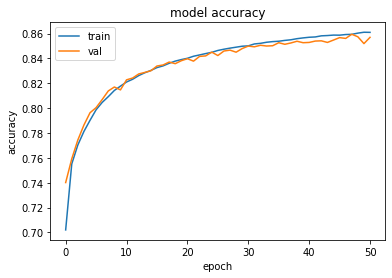

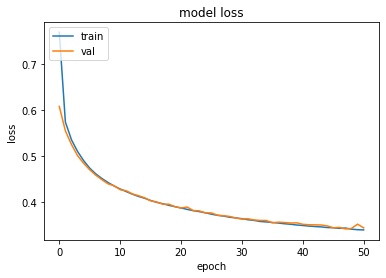

In [ ]:
plot_history(history, 'acc')
plot_history(history, 'loss')

* **Accuracy**: probability that the model assigns the highest probability to the correct class (1 is best).
* **Loss**: how off the prediction was from the actual class (0 is best).

### Evaluate on Validation Data

In [ ]:
score = model.evaluate(features_test_scaled, label_test, verbose=0)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

Test loss: 0.34878137707710266
Test accuracy: 0.8565613627433777


### Classification Report
1. Predict classes for the test cases and convert the predictions to discrete values. 
2. Use the **classification report** to calculate additional evaluation statistics.

In [ ]:
y_pred = model.predict(features_test_scaled)

y_pred = np.argmax(y_pred, axis=1)
class_names = ['Spruce/Fir', 'Lodgepole Pine',
                   'Ponderosa Pine', 'Cottonwood/Willow',
                   'Aspen', 'Douglas-fir', 'Krummholz']
print(classification_report(label_test, y_pred, target_names=class_names))

                   precision    recall  f1-score   support

       Spruce/Fir       0.84      0.87      0.86     42368
   Lodgepole Pine       0.88      0.87      0.88     56661
   Ponderosa Pine       0.84      0.83      0.84      7151
Cottonwood/Willow       0.80      0.70      0.75       549
            Aspen       0.75      0.49      0.60      1899
      Douglas-fir       0.66      0.72      0.69      3473
        Krummholz       0.89      0.83      0.86      4102

         accuracy                           0.86    116203
        macro avg       0.81      0.76      0.78    116203
     weighted avg       0.86      0.86      0.86    116203



* **Precision**: proportion of positive identifications of the class that were actually correct.
* **Recall**: proportion of actual positives of the class that were identified correctly.
* **F1 score**: weighted average of precision and recall.

### Confusion Matrix

Define a function to calculate a **confusion matrix** and plot a **heatmap** based on the matrix to further evaluate performance of model.

In a confusion matrix, the **boxes along the diagonal** spanning from the top left to bottom right corners are cases that have been classified correctly. 

Each box (i,j) is equal to the number of observations known to be in group i and predicted to be in group j.

In [ ]:
def plot_heatmap(class_names, y_pred, y_test):
  cm = confusion_matrix(y_test, y_pred)
  fig, ax = plt.subplots(figsize=(15, 15))
  heatmap = sns.heatmap(cm, fmt='g', cmap='Blues', annot=True, ax=ax)
  ax.set_xlabel('predicted class')
  ax.set_ylabel('True class')
  ax.set_title('Confusion matrix')
  ax.xaxis.set_ticklabels(class_names)
  ax.yaxis.set_ticklabels(class_names)

  heatmapfig = heatmap.get_figure()

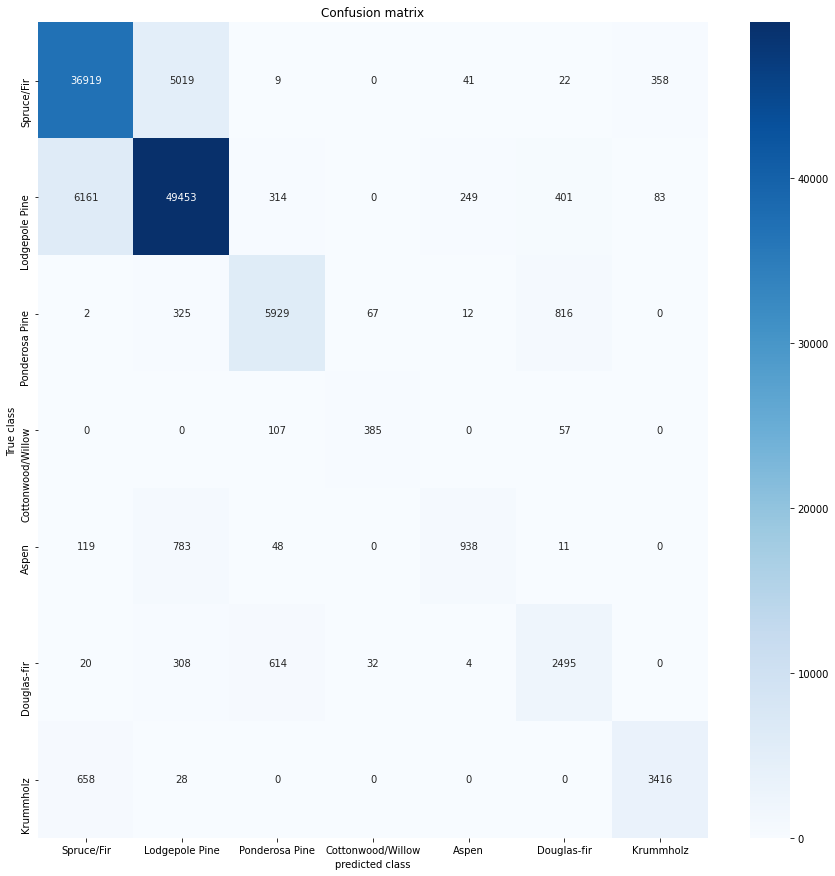

In [ ]:
plot_heatmap(class_names, y_pred, label_test)

## **Conclusion** 

From the heatmap, it is evident that Spruce/Fir, Lodgepole Pine, Ponderosa Pine, Douglas-fir, and Krummholz have, for the most part, been classified correctly.

On the other hand Cottonwood Willow and Aspen suffer from a high percentage of mis-classifications. There are many possible causes for this, and some potential aspects to consider include the following:

1. Imbalances in the proportion of observations for each cover-type present in the original dataset.
2. The distribution of each wilderness area.
3. Some independent variables included in the dataset that are not cartographic in nature could be removed (such as proximity to roads).
5. Other performance metrics apart from accuracy could be used. Accuracy is more unreliable when data in imbalanced.

The most important thing to understand here is that in deep-learning, the gradient(s) of the majority class(es) dominate(s) and will influence the weight-updates. There are also some advanced techniques that will ameliorate this situation.